In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer

import cvxpy as cp
from cvxpylayers.torch import CvxpyLayer

from util.collision_loss import torch_collision_check
from util.zonotope import Zonotope, TorchZonotope
from util.constrained_zonotope import ConstrainedZonotope, TorchConstrainedZonotope
from util.NN_con_zono import forward_pass_NN_torch

# Neural network reachability

In [3]:
# Toy 2 Layer network
# 2 - 3 - 2

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(2, 3)  
        self.fc2 = nn.Linear(3, 2)  

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()

In [4]:
# input zonotope
Z_in = TorchZonotope(torch.zeros(2,1),torch.eye(2))

# compute initial reachable set
t_start = timer()
Z_out = forward_pass_NN_torch(Z_in, net)
t_end = timer()
print("elapsed time (s): ", t_end - t_start)

NameError: name 'forward_pass_NN_torch' is not defined

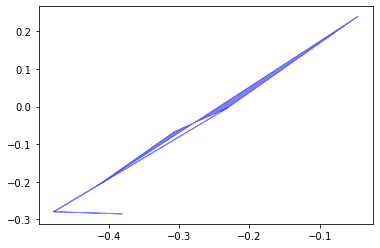

In [15]:
# plot zonotopes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
for z in Z_out:
    z.plot(ax1)
Z_obs.plot(ax1, 'r')
# plot samples
N_samples = 10000
X_in = np.random.uniform(-1, 1, (N_samples,2))
X_in = torch.as_tensor(X_in, dtype=torch.float)
Y_out = net(X_in)
ax2.scatter(Y_out[:,0].detach().numpy(), Y_out[:,1].detach().numpy())

# Rollout function composition

In [1]:
from util.NN_con_zono import ReLU_con_zono_single